## PHYS 481 Assignment 1

Kenneth Sharman (00300185)

In [1]:
# Import standard packages
import numpy as np
import matplotlib.pyplot as plt

### Introduction

To kick things off in PHYS 481 we are going to do a review of several key concepts that were studied in PHYS 381. These include:
    - Data Structures and Data Types. Specifically; lists, tuples, integers, and floating-point numbers.
    - Roundoff errors
    - Floating point equality checks
    - Proper Documentation (docstring and comments)
    - Runtime complexity
    - Presentation of findings (tables and plots)
As we progress through this assignment several new ideas will be introduced. We will begin to think about what constitutes "true" randomization by analyzing two types of card shuffling techniques. This line of thought will carry over when we begin to study the idea of randomly generating numbers on a computer. These exercises will also provide an additional opportunity to practice manipulating data sets, with the help of the numpy library.

We have already learned that testing our results is an absolute necessity. For many of the examples encountered so far, we have been able to check our output with the expected values. This is not always the case, most notably when the problem at hand has not yet been solved. The ability to properly test the output is not a straightforward process, as it varies from problem to problem. Only with repeated practice will we become efficient and effective at making these tests. We will add unit tests to our skill set, which are functions that assert that the results match expectations. Units tests are common in computer science courses and in many jobs, and therefore are a good tool to add to the toolkit.

### 1) What are the differences between lists and tuples?
Lists and tuples are both built-in types offered by Python. Note that they are not primitive data types, rather objects available in Python without the need of any external library or package.

An important skill in computer science is to develop the habit of consulting the documentation associated with functions and objects that may be implemented. The Python Documentation states$^1$:

<blockquote cite="https://docs.python.org/3/library/stdtypes.html?highlight=list#sequence-types-list-tuple-range">
 - Lists are mutable sequences, typically used to store collections of homogeneous items (where the precise degree of similarity will vary by application).
<br /> 
 - Tuples are immutable sequences, typically used to store collections of heterogeneous data (such as the 2-tuples produced by the enumerate() built-in). Tuples are also used for cases where an immutable sequence of homogeneous data is needed (such as allowing storage in a set or dict instance).
</blockquote>
 
From these definitions we see that lists are sequences that can be manipulated and changed. Tuples are a sort of "fixed" object. Once instantiated, the underlying data structure does not permit the modification of the instance variables.  

We found a YouTube video that highlighted the differences between the types (https://youtu.be/-8i1HJSo_T0 $^2$). For the purposes of using Python for physics, it can be helpful to think of a tuple of a set of coordinates. Consider a 3-tuple representing the $x, y, z$ coordinates of a position vector. It does not make sense to add or remove a component from the tuple (fixed length), as we are describing a point in 3-dimensional space. Further, a point in space is fixed; we do not wish to manipulate the data representing that point.

Lists on the other hand, may be viewed as a collection of points. Adding or removing from this list is logical, as we can refer to a collection of points that changes over time.

From our experience in PHYS 381 it is important to remember a subtly that arises when declaring a 1-tuple; a comma must follow the single element.

$$ (x) \neq (x,) $$

We came across this issue when passing additional arguments to the romberg and quad functions. It is in fact that comma that forms the tuple, not the parentheses. The parentheses can actually be omitted from the declaration statement, as highlighted by the following block of code.

In [2]:
tuple1 = (1, 2)
tuple2 = 1, 2
print('Type of tuple1', type(tuple1))
print('Type of tuple2', type(tuple2))

Type of tuple1 <class 'tuple'>
Type of tuple2 <class 'tuple'>


### 2) Directly calculating the factorial can be difficult.  Check the value for 52! given by Wikipedia using only the Python core if possible, or with additional packages if necessary.

The naive approach to this problem would be to define an array with elements from 1 through 52 and attempt to multiply all the elements together. This results in an overflow error (code shown in markdown to avoid overflow warning).  

<pre>
num_list = np.arange(52)+1 # List from 1 to 52

fact52 = 1 # Initialize variable used to save result
for n in num_list:
    fact52 *= (n) # Multiply together the numbers 1 to 52
</pre>

In our example the error occurs because fact52 is of type int32. The maximum int value is $2^{31-1}$. Note that if we declare the variable as a floating point, the result does not overflow:

In [3]:
num_list = np.arange(52)+1 # List from 1 to 5
fact52 = 1.0 # Initialize variable as float

for n in num_list:
    fact52 *= (n)

print(fact52)
print(type(fact52))

8.065817517094388e+67
<class 'numpy.float64'>


We can compare the result to the accepted value of $52!$.

In [4]:
accepted_val = 80658175170943878571660636856403766975289505440883277824000000000000 # 52!
diff = np.abs( accepted_val - fact52)
print( 'Difference:', diff )
assert diff < 1e-32

Difference: 0.0


If we were in a rush, we could easily conclude that our calculation was correct and move on. Since our result is a floating point number, we should note that precision on the order of 1e-32 seems a little too good to be true. Indeed, we can see that this is not true by suppressing the scientific notation representation of our answer.

In [5]:
print('%f' % fact52)
print(accepted_val)

80658175170943876845634591553351679477960544579306048386139594686464.000000
80658175170943878571660636856403766975289505440883277824000000000000


It appears that Python has done some sort of rounding of the result, when the scientific notation was introduced. Let's try typecasting the result to an int and compare again.

In [6]:
diff = np.abs( accepted_val - int(fact52))
print( 'Difference', diff )
# assert diff < 1e-32 , 'Danger Will Robinson' ASSERTION FAILS 

Difference 1726026045303052087497328960861577229437860405313536


Our calculated result is nowhere close! This is a good example of how one can obtain a result that doesn't throw an exception and is the correct order of magnitude, yet still far from a correct calculation.

A more refined approach to this problem would be to define a function that calculates the result. For simplicity, we will use a lambda function.

In [7]:
fac = lambda x: x * fac(x-1) if x>1 else 1

In [8]:
print(type(fac(52)))
print(type(accepted_val))

print(fac(52))
print(accepted_val)

print('Difference =', fac(52) - accepted_val)

assert( fac(52) == accepted_val ) # Boolean comparison since int dtype

<class 'int'>
<class 'int'>
80658175170943878571660636856403766975289505440883277824000000000000
80658175170943878571660636856403766975289505440883277824000000000000
Difference = 0


It appears that our function calculates the correct result. 

Something interesting has happened here. It appears Python is breaking its own "rules". Both fact(52) and accepted_val are of type int, however they are larger than the int64 maximum. After digging around we found the following information $^3$:

<blockquote cite="https://docs.python.org/3.1/whatsnew/3.0.html#integers">
PEP 0237: Essentially, long renamed to int. That is, there is only one built-in integral type, named int; but it behaves mostly like the old long type.
<br /> 
The sys.maxint constant was removed, since there is no longer a limit to the value of integers. However, sys.maxsize can be used as an integer larger than any practical list or string index. It conforms to the implementation’s “natural” integer size and is typically the same as sys.maxint in previous releases on the same platform (assuming the same build options).
</blockquote>

It appears Python has developed a "work-around" for the maximum storable int values. 

We have made use of the high-level aspects of Python, without really knowing the intricate details. The important message here is to recognize that there are numerous ways to perform a certain operation. It is essential ask if the result makes sense and to compare (if possible) against known values. Finally, since Python is a dynamically-typed language it is important to be aware of possible conversions that may have taken place, as they can have a significant influence on the outcome of a calculation.

### 3) Write a function to apply an "overhand" shuffle that can be used in the following way:
    
    deck = list( range(52) )
    deck = overhand_shuffle(deck, blocksize=8)
    
where "blocksize" is the number of cards that are moved in each step.

In [9]:
def overhand_shuffle(deck, blocksize):
    '''
    Function performs an overhand shuffle. If the blocksize is not a divisor of the deck length, then the last pass
    has a blocksize equal to the remainder. List is shuffled and transferred to return variable using append function,
    hence the order is reversed in the final step.
    Parameters
        deck: list representing a deck of cards. Assume integer numbering of cards for suits and numbers
        blocksize: Size of card pack transferred each pass of the shuffle
    Returns
        A list representing the shuffled order of the cards
    '''
    result = [] # List used to store shuffle result 
    stack = [] # List used to implement correct ordering of each block transferred 
    
    assert blocksize <= len(deck), 'Blocksize must be smaller than the number of cards'
    
    for i in range ( len(deck)//blocksize ):
        for j in range ( blocksize - 1 ): 
            stack.append( deck.pop(0) ) # Push all cards in the block to the stack except the last
        result.append( deck.pop(0) ) # Push last card in block to return list  
        for k in range (blocksize - 1 ):
            result.append( stack.pop() ) # Pop all cards from stack to the return list
    
    while len(deck) != 0:
        stack.append( deck.pop(0) ) # Push remaining cards to stack        
    while len(stack) != 0:
        result.append( stack.pop() ) # Pop all cards on stack to return list
    
    result = result[::-1] # Reverse order of the list
    return result

# Function could benefit from the implementation of singly linked list, instead of return array.
# In theory using a linked list which be more efficient as only 2 pointers would have to be changed with each block pass.
# Reversing the order of the sequence would not be necessary in this case.

To verify the overhand_shuffle is properly implemented, a deck size of 10 was shuffled by hand and compared to the following output. The output was consistent with our shuffled deck of cards.

In [10]:
deck = list( range(10) )
print(overhand_shuffle(deck, blocksize=8))

[8, 9, 0, 1, 2, 3, 4, 5, 6, 7]


In [11]:
deck = list( range(52) )
print(overhand_shuffle(deck, blocksize=8))

[48, 49, 50, 51, 40, 41, 42, 43, 44, 45, 46, 47, 32, 33, 34, 35, 36, 37, 38, 39, 24, 25, 26, 27, 28, 29, 30, 31, 16, 17, 18, 19, 20, 21, 22, 23, 8, 9, 10, 11, 12, 13, 14, 15, 0, 1, 2, 3, 4, 5, 6, 7]


### 4) It is generally thought that shuffling at least 7 times will effectively randomize a deck of cards. Is this true for the "riffle_shuffle" function? How is this function different than a real riffle shuffle?

A real riffle shuffle differs from the idealized shuffle, where the deck is split in half equally, and then then cards recombine one-at-a time from each of the halves. When performing the shuffle by hand it is quite hard to evenly split the deck in half. It isn't hard to imagine that doing an even split in 7 out of the 7 shuffles is next to impossible. Further, if you have ever tried to do a riffle shuffle (especially off the table) alternating the cards from each half is also extremely difficult.

The riffle_shuffle function implements the idealized version of the shuffle, and was provided in class. 

In [12]:
def riffle_shuffle(deck):
    """ This function changes the order of a sequence 
    by dividing it into two sections and merging them
    like shuffling a deck of cards.
    """
       
    ncards = len(deck)
    assert( (ncards %2) == 0 )
    #assert( ncards == 52 )
    
    nhalf = ncards//2
    half0 = deck[0:nhalf]
    half1 = deck[nhalf:]
   
    result = []
    for indx in range( nhalf ):
        result.append( half0[indx] )
        result.append( half1[indx] )   

    return result

To get a feeling for what the function was doing after multiple shuffles, a smaller deck size was used, and the output was displayed after each shuffle. It appears that without the introduction of human error, the deck will eventually be ordered as the original sequence.

We defined the following function to test it out for various deck sizes.

In [13]:
from scipy.special import factorial # Function used to restrict while loop in shuffle_until_ordered function

def shuffle_until_ordered(deck_size, display=False):
    '''
    Function calls the riffle_shuffle function repeatedly until the deck returns to its ordered state or the function
    has been called as many times as there are permutations of deck.
    Parameters
        deck_size: Length of array representing the number of cards in the deck
        display: Prints the deck contents after each shuffle
    Returns
        Number (int) of shuffles required to reorder the deck
    '''
    
    def isOrdered(deck):
        result = True
        ordered_deck = list( range(deck_size) )
        for i in range( len(deck) ):
            check_cards = deck[i] is ordered_deck[i] # Check that the ith cards are equal
            result = result and check_cards # Update return variable
        return result
    
    deck = list( range(deck_size) )
    
    counter = 0
    while counter < factorial(deck_size): # Attempt maximum number of shuffles equal to possible permutations of deck 
        deck = riffle_shuffle(deck)
        counter += 1
        
        if display == True:
            label = "After shuffle " + str(counter) + ":"
            print(label, deck)
        
        if isOrdered(deck):
            break
    return counter

In [14]:
# Visualize the shuffling process with a small deck
cnt = shuffle_until_ordered(10, True)
print('Number of shuffles required to reorder the deck:', cnt)

After shuffle 1: [0, 5, 1, 6, 2, 7, 3, 8, 4, 9]
After shuffle 2: [0, 7, 5, 3, 1, 8, 6, 4, 2, 9]
After shuffle 3: [0, 8, 7, 6, 5, 4, 3, 2, 1, 9]
After shuffle 4: [0, 4, 8, 3, 7, 2, 6, 1, 5, 9]
After shuffle 5: [0, 2, 4, 6, 8, 1, 3, 5, 7, 9]
After shuffle 6: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
Number of shuffles required to reorder the deck: 6


In [15]:
# Check how many shuffles will reorganize a 52 card deck
cnt = shuffle_until_ordered(52)
print('Number of shuffles required to reorder the deck:', cnt)

Number of shuffles required to reorder the deck: 8


Using this function, we can see that the riffle_shuffle will not randomize a deck of cards after 7 shuffles. Passing the deck through the function one more time will in fact return it to its original order.

Will repeated shuffles of any deck size always result in the reordering of the cards? Let's have a look at the number of shuffles required for a range of deck sizes.

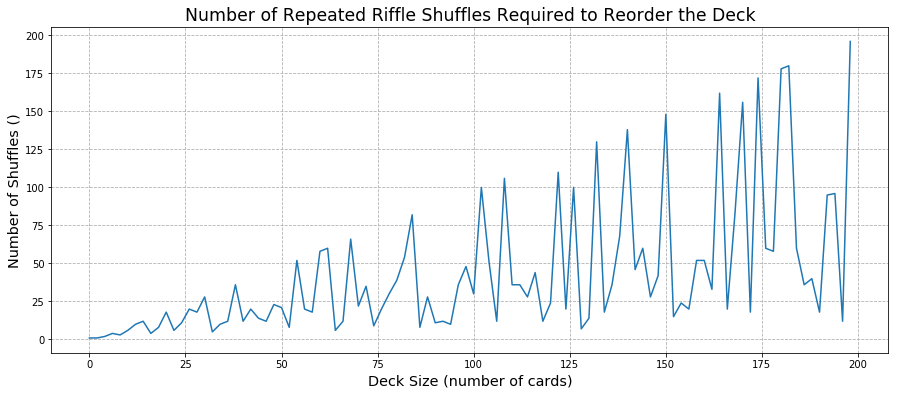

In [16]:
count_list = []
deck_sizes = []

# Compute number of shuffles for reordering of various deck sizes and add results to lists for plotting
for i in range(100):
    deck_sizes.append( 2*i )
    count_list.append( shuffle_until_ordered( 2*i ) )

fig = plt.figure(figsize=(15,6))
ax = plt.subplot()
ax.grid(linestyle='dashed')

plt.xlabel('Deck Size (number of cards)', fontsize='x-large')
plt.ylabel('Number of Shuffles ()', fontsize='x-large')
plt.title('Number of Repeated Riffle Shuffles Required to Reorder the Deck', fontsize='xx-large')

plt.plot(deck_sizes, count_list) # Plot shuffles vs deck size
plt.show()

Graphing our results highlights two different features. The first is the curve is not smooth. Increasing the deck size does not necessarily increase the number of shuffles required. Secondly, as the deck size increases the number of shuffles oscillates with increasing amplitude. For our purposes, it is interesting to note that code compiled without throwing an exception. This indicates that the riffle function has in fact successfully reordered all the deck sizes passed (max 200). Note that this does not mean that ANY deck size will be reordered by repeated shuffling. It may turn out that the function successfully randomizes very large deck sizes, we just didn't see that in the range tested.

What's important to note here is that the results of a well understood process may be very different from expectations when executed on a computer. It is tempting to think that a machine executed shuffle would be more "efficient" in terms of randomizing, than that of a human. The opposite turns out to be true. It is the human error that results in a truly shuffled deck of cards.

### 5) Compare the computation time required for the catmap1 and catmap2 functions.

Mapping functions provided in class:

In [17]:
def catmap1(square):
    """Apply Arnold's cat map to a square NxN numpy array
    using loops to modify pixels one at a time.
    """
    
    nx,ny = square.shape[0:2]
    
    if nx != ny or ny <= 1:
        return 'ERROR: Not Square'
    
    result = square.copy()
    for x in range(nx):
        for y in range(ny):
            xx = x + y
            yy = x + 2*y
            result[x,y] = square[xx % nx, yy % ny]
            
    return result

In [18]:
def catmap2(square):
    """
    Apply Arnold's cat map to a square NxN numpy array 
    using array indexing.
    """
    
    nx,ny = square.shape[0:2]
    if nx != ny or ny <= 1:
        return 'ERROR: Not Square'
    
    x, y = np.arange(nx), np.arange(ny)
    xx, yy = np.meshgrid(x, y, sparse=False, indexing='ij')
    
    xx = xx + yy
    yy = yy + xx
    
    return square[xx % nx, yy % ny]    

These two functions were tested in class, and verified that they produced the same results using the following code for matrices of size $2x2$ to $45x45$ ($n=45$ seemed to be the value that compiled in a reasonably quick time):

In [19]:
n_vals = np.arange(2, 46, 1)

for n in n_vals:
    test = np.arange(n*n).reshape(n,n)
    test1 = test.copy()
    test2 = test.copy()

    for indx in range(n**2):
        test1 = catmap1( test1 )
        test2 = catmap2( test2 )

        # check that both mapping algorithms give the same results
        #
        if np.any(test1 != test2):
            print('Error: mismatch at step ',indx)

It was recommended in class to begin thinking about how we can write unit tests for our code. The expected result of applying Arnold's cat map to a $2x2$ matrix was compared to the output of both functions. In order to retain the same matrix size ($N \; x \; N$) we have used mod $N$.

Arnold's cat map:
$$ \Gamma = (x,y) \rightarrow (2x+y, x+y) \; mod \; N $$

Test against the following expectations:

$$ \Gamma \begin{pmatrix}0 & 1\\\ 2 & 3\end{pmatrix} \rightarrow \begin{pmatrix}0 & 2\\\ 3 & 1\end{pmatrix} $$

$$ \Gamma \begin{pmatrix}0 & 1 & 2\\\ 3 & 4 & 5 \\\ 5 & 6 & 7\end{pmatrix} \rightarrow \begin{pmatrix}0 & 5 & 7\\\ 4 & 6 & 2 \\\ 8 & 1 & 3\end{pmatrix} $$

We will also pass a non-square matrix and verify that the function returns an error message.

In [20]:
def unit_test_1(func):
    '''
    Test verifies cat map output of 2x2 matrix
    Parameter: func is the cat map function to be tested
    '''
    array = np.array( [ [0, 1], [2, 3] ] )
    expected = np.array( [ [0, 2], [3, 1] ] )
    assert np.array_equal( func(array), expected), 'Unit Test Failed'

def unit_test_2(func):
    '''
    Test verifies cat map output of 3x3 matrix
    Parameter: func is the cat map function to be tested
    '''
    array = np.array( [ [0, 1, 2], [3, 4, 5], [6, 7, 8] ] )
    expected = np.array( [ [0, 5, 7], [4, 6, 2], [8, 1, 3] ] )
    assert np.array_equal( func(array), expected), 'Unit Test Failed'
    
def unit_test_3(func):
    '''
    Test verifies cat map function returns error message for non-square matrices.
    Parameter: func is the cat map function to be tested
    '''
    array = np.array( [ [0, 1], [2, 3], [4, 5] ] )
    assert np.array_equal( func(array), 'ERROR: Not Square'), 'Unit Test Failed'

Now that we have defined the unit tests, we will run them. We expect that no assertion error will be thrown, so long as the cat map functions are doing what we expect.

In [21]:
unit_test_1(catmap1)
unit_test_2(catmap1)
unit_test_3(catmap1)

In [22]:
unit_test_1(catmap2)
unit_test_2(catmap2)
unit_test_3(catmap2)

All the tests passed, as expected.

At this point we have made some effort to verify that our cat map functions are consistent with our expectations.

We will now use the automagic timeit function to get an idea of how the functions compare to each other. We expect catmap2 to be the faster function as it uses matrix operations as opposed to iteration.

In [23]:
n = 2
test = np.arange(n*n).reshape(n,n)

print('catmat1 results:')
%timeit catmap1(test)
print('catmat2 results:')
a = %timeit catmap2(test)

catmat1 results:
2.89 µs ± 15.2 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
catmat2 results:
28.6 µs ± 73.9 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


It appears that the catmap1 is outperforming catmap2. A 4x4 grid is relatively small, so it would be wise to test out a larger value of $n$.

In [24]:
n = 20
test = np.arange(n*n).reshape(n,n)

print('catmat1 results:')
%timeit catmap1(test)
print('catmat2 results:')
a = %timeit catmap2(test)

catmat1 results:
144 µs ± 11.9 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
catmat2 results:
50.5 µs ± 5.4 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


We note a significant jump in the runtime of catmap1. It would be helpful plot a range of matrix sizes and the corresponding runtimes for each function. Unfortunately the automagic timeit command does not provide a single runtime return value, and we needed to figure out an alternative method.

https://www.pythoncentral.io/time-a-python-function/ provided a wrapper function, which can be used in conjunction with the timeit package, to obtain runtime data.

In [25]:
def wrapper(func, *args, **kwargs):
    '''
    Function source from https://www.pythoncentral.io/time-a-python-function/
    Provides a function wrapper, which is used to call timeit function
    '''
    def wrapped():
        return func(*args, **kwargs)
    return wrapped

In order to construct our plot we populated runtime lists for both functions using the timeit function. These times were plotted against the gridsizes $n=2$ to $n=45$.

In [26]:
import timeit

n_vals = np.arange(2, 46) # Range of matrix sizes
time1, time2 = [], [] # Lists for average runtimes of catmap1 and catmap2 respectively

for n in n_vals:
    test1 = np.arange(n*n).reshape(n,n)
    wrapped1 = wrapper(catmap1, test1)
    time1.append( timeit.timeit(wrapped1, number=1000) ) 
    
    test2 = np.arange(n*n).reshape(n,n)
    wrapped2 = wrapper(catmap2, test2)
    time2.append( timeit.timeit(wrapped2, number=1000) )

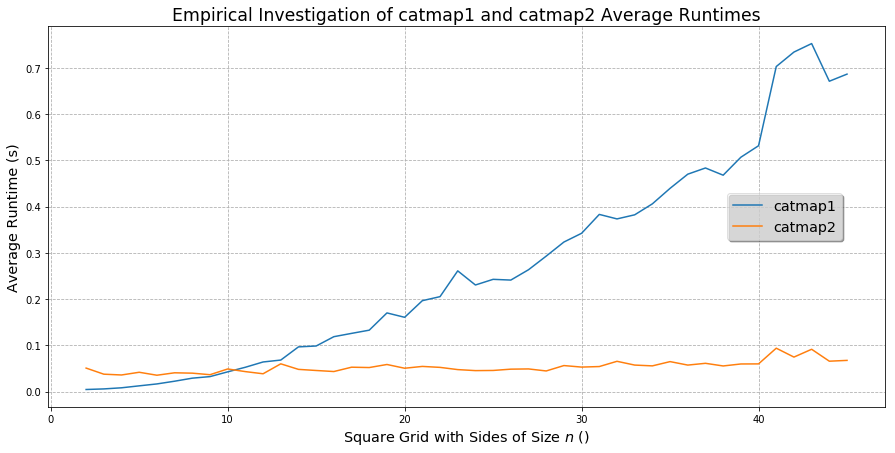

In [27]:
plt.figure(figsize=(15,7)) # Set the plot size

# Plot running times for both catmap functions
plt.plot(n_vals, time1, label='catmap1')
plt.plot(n_vals, time2, label='catmap2')

# Label Plot
plt.xlabel("Square Grid with Sides of Size $n$ ()", fontsize='x-large')
plt.ylabel("Average Runtime (s)", fontsize='x-large')
plt.title("Empirical Investigation of catmap1 and catmap2 Average Runtimes", fontsize='xx-large')

plt.grid(linestyle='dashed') # Add grid with solid lines to graph

# Add customized legend
legend = plt.legend(loc=5, fontsize='x-large', shadow=(True), borderaxespad=3)
frame = legend.get_frame()
frame.set_facecolor('#f9f9f9')
frame.set_alpha(0.6)

plt.show()

This plot gives us a much better understanding of the input size/ runtime relationship. It appears that the complexity of catmap1 is roughly constant. The double summation in the catmap2 function tells us that catmap2 $\in \Theta(n^2)$. This is consistent with the shape of the graph. Clearly catmap2 runs faster than catmap1 with larger datasets of this order of magnitude.

It is important to keep in mind that, in general, the runtime behavior may suddenly change for extremely large input values.  Just because we see a function out performing another on a particular range does not guarantee that this will always be true. It is essential to test your code at the extreme ranges of your data.

### 6) Write a function to determine the number of iterations required to map an $N \times N$ image onto itself.  Tabulate the results for $N=2$ to $N=20$ and plot results up to $N=256$.

We will define a simple function that maps an image into itself.

In [28]:
def selfMap(image):
    ''' 
    Modified function provided in class. Function maps a square image onto itself
    Parameters
        image: an n x n array
    Returns
        n x n array containing mapped image
    '''
    
    nx,ny = image.shape[0:2]
    assert (nx == ny & ny > 1)
    
    result = image.copy()
    for x in range(nx):
        for y in range(ny):
            result[x,y] = image[x, y]
            
    return result

To test that the function works correctly we will make use of the code provide in class which compares two multi-dimensional arrays. We will compare a cat image to the mapped cat image.

In [29]:
# Use the python imaging library (PIL) package to read an image
# from a network URL.

from PIL import Image
import requests
from io import BytesIO

image_url = r"https://www.jasondavies.com/catmap/catmap.jpg"
response = requests.get(image_url)
img =  Image.open(BytesIO(response.content)) 
cat = np.array( img )

In [30]:
for indx in range(cat.shape[0]):
    cat_mapped = selfMap(cat)
    
# Check that original and mapped images contain same elements
if np.any(cat != cat_mapped):
    print('Error: mismatch at step ',indx)
else:
    print('Success. Mapped image is same as original.')

Success. Mapped image is same as original.


Next, we will modify the selfMap function so that it counts the number of iterations, and returns a tuple containing the mapped image and the number of iterations.

In [31]:
def selfMap(image):
    ''' 
    Modified function provided in class. Function maps a square image onto itself
    Parameters
        image: an n x n array
    Returns
        n x n array containing mapped image
    '''
    
    nx,ny = image.shape[0:2]
    assert (nx == ny & ny > 1)
    
    count = 0
    result = image.copy()
    for x in range(nx):
        for y in range(ny):
            result[x,y] = image[x, y]
            count += 1
            
    return (result, count)

Finally, we will compile a list of iteration counts for $N$ values ranging from $N=2$ to $N=256$.

In [32]:
n_vals = np.arange(2, 256+1)
square_vals = [ np.arange(n*n).reshape(n,n) for n in n_vals ]
counts = [ selfMap(square)[1] for square in square_vals ]

We will use pandas to tabulate the first 20 results and matplotlib to plot all the data.

In [33]:
import pandas as pd

df1 = pd.DataFrame({
  'N': n_vals,
  '# Iterations': counts,
})

df1 = df1[['N','# Iterations']] # Override alphabetical column ordering
#print(df1.head(19)) displays annoying indices

print('Number of iterations Required for mapping NxN image onto itself')
print(df1.head(19).to_string(index=False)) # Workaround to omit indices

Number of iterations Required for mapping NxN image onto itself
N  # Iterations
 2             4
 3             9
 4            16
 5            25
 6            36
 7            49
 8            64
 9            81
10           100
11           121
12           144
13           169
14           196
15           225
16           256
17           289
18           324
19           361
20           400


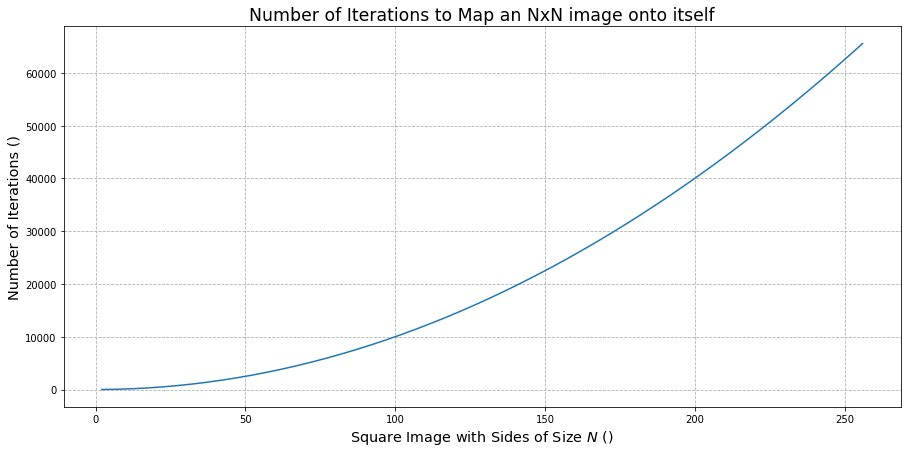

In [34]:
plt.figure(figsize=(15,7)) # Set the plot size

plt.plot(n_vals, counts) # Plot iterations against input size

# Label Plot
plt.xlabel("Square Image with Sides of Size $N$ ()", fontsize='x-large')
plt.ylabel("Number of Iterations ()", fontsize='x-large')
plt.title("Number of Iterations to Map an NxN image onto itself", fontsize='xx-large')

plt.grid(linestyle='dashed') # Add grid with solid lines to graph

plt.show()

Since both the inner and the outer for loop run $N$ times, we expected that $N^2$ iterations would be required to perform this mapping. This is exactly what is displayed by the graph.
This exercise demonstrates how a perfectly valid method can in fact be quite inefficient and expensive- especially with extremely large sets of data. 

## Conclusion

We started this report off by examining different data types, list and tuples. While they possess certain similarities, we noted that their differences highlighted their pros and cons in certain applications. It is important to understand the data type that is being used in an analysis, as it may impose certain restrictions on the data manipulations allowed. Further, the example of 52 factorial illustrated that different data types can have vastly different behavior even when it comes to "simple" operations, performed in different ways. 

Two different card shuffles were used to introduce the idea of randomization on a computer. It was noted that a process "designed" to randomize the order of a deck of cards was not successful (in randomizing) when implement in code. That is to say; continuing the shuffling process will eventually reorder the cards (whether or not the observer knows that is another question). Without human error, the riffle shuffle is in fact cyclic over the course of repeated shuffles. This begs the question of if we can actually code an algorithm that is truly random, or if it simply appears random to an observer that does not have all the necessary information required to understand the state of the system. We will continue the analysis of this question later in the semester.

Finally, we were introduced to the idea of mapping an image, using Arnold's Cat Map algorithm. In this exercise we emphasized the testing process, to ensure that the functions we defined were behaving as expected. The function results were compared to the calculation done by hand, and to each other. The testing process is essential in computational methods in order to ensure the results make sense. Secondly, this mapping exercise allowed us to analyze the runtime for varied input sizes. They key point here was that while there are many routes to a particular end goal, the path followed may vary significantly. Iteration is simple to code, and easy to read, however for larger data sets it can be quite costly. We have been exposed to this concept before, when we studied the Mandelbrot set in PHYS 381. Allowing the idea of matrix operations to sink in over the summer gives me reason to believe that implementing such algorithms should become more of a second nature- although there is still some work to get to that point.

### References
1. Python Documentation https://docs.python.org/3/library/stdtypes.html?highlight=list#sequence-types-list-tuple-range
2. Video on Lists and Tuples https://youtu.be/-8i1HJSo_T0
3. Python updates https://docs.python.org/3.1/whatsnew/3.0.html#integers